<a href="https://colab.research.google.com/github/SherZhou/Computational-Physics/blob/main/2_1_Relaxation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import copy


In [ ]:
epsilon=1
h=1
errorbound=10**-4

# 1 (a)

In [ ]:
N=int(21)
rho1=np.zeros((N,N))
l=int(17)
for i in range(13,0,-1):
    for j in range(int(11-(l-1)/2-1),int(11+(l-1)/2)):
        rho1[i,j]=1
    l=l-2

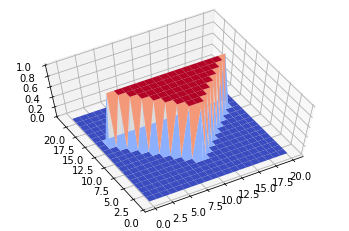

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X = np.arange(N)
Y = np.arange(1,22)
X, Y = np.meshgrid(X, Y)
surf = ax.plot_surface(X, Y, rho1, cmap=cm.coolwarm, linewidth=0, antialiased=True)
ax.view_init(65, 240)
plt.show()

In [ ]:
phi=np.zeros((N,N))
dbou=81/76
d=2
itr=0
e=1
while e>errorbound:
    phi_old=copy.deepcopy(phi);
    # update the interior using Jacobi Relaxation scheme
    for i in range(1,N-1):
        for j in range(1,N-1):
            phi[i,j]=1/(2*d)*(phi_old[i-1,j]+phi_old[i,j-1]+phi_old[i+1,j]+phi_old[i,j+1])+h**2/(2*d*epsilon)*rho1[i,j]; 
    # update the 4 edges
    for i in range(1,N-1):
        phi[0,i]=phi[1,i]-dbou*h;
        phi[N-1,i]=phi[N-2,i]-dbou*h;
        phi[i,0]=phi[i,1]-dbou*h;
        phi[i,N-1]=phi[i,N-2]-dbou*h;
    # update the 4 corners
    phi[0,0]=1/2*(phi[0,1]+phi[1,0])-dbou*h;
    phi[0,N-1]=1/2*(phi[1,N-1]+phi[0,N-2])-dbou*h;
    phi[N-1,0]=1/2*(phi[N-2,0]+phi[N-1,1])-dbou*h;
    phi[N-1,N-1]=1/2*(phi[N-1,N-2]+phi[N-2,N-1])-dbou*h;
    error=np.abs(phi_old-phi);
    e=np.max(error);
    itr=itr+1;

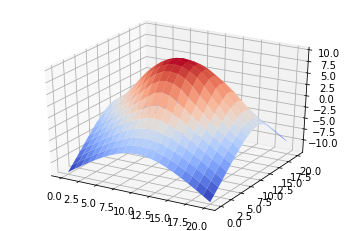

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X = np.arange(N)
Y = np.arange(N)
X, Y = np.meshgrid(X, Y)
surf = ax.plot_surface(X, Y, phi, cmap=cm.coolwarm, linewidth=0, antialiased=True)
plt.show()

# 1 (b)

In [ ]:
def drawhexagon(N):
  rho_here=np.zeros((N+3,N+3));
  for i in range(1,int(N/4+2)):
      for j in range(int(np.ceil(N/2+2-(i-2)*np.sqrt(3)))-1,int(np.floor(N/2+2+(i-2)*np.sqrt(3)))):
          rho_here[i,j]=1;

  for i in range(int(N/4+2),int(3*N/4+2)):
      for j in range(int(np.ceil(N/2+2-N/4*np.sqrt(3)))-1,int(np.floor(N/2+2+N/4*np.sqrt(3)))):
          rho_here[i,j]=1;

  for i in range(int(3*N/4+2),int(N+2)):
      for j in range(int(np.ceil(N/2+2-(N+2-i)*np.sqrt(3)))-1,int(np.floor(N/2+2+(N+2-i)*np.sqrt(3)))):
          rho_here[i,j]=1;
  return rho_here 

In [ ]:
#Jacobi relaxation
def JR(rho):
  N_here=np.size(rho,0)
  phi=np.zeros((N_here,N_here))
  d=2
  itr=0
  e=1
  while e>errorbound:
      phi_old=copy.deepcopy(phi);
      for i in range(1,N_here-1):
          for j in range(1,N_here-1):
              phi[i,j]=1/(2*d)*(phi_old[i-1,j]+phi_old[i,j-1]+phi_old[i+1,j]+phi_old[i,j+1])+h**2/(2*d*epsilon)*rho[i,j]
      error=np.abs(phi_old-phi)
      e=np.max(error)
      itr+=1
  return phi,itr

In [ ]:
#Gauss-Seidel relaxation
def GSR(rho):
  N_here=np.size(rho,0)
  phi=np.zeros((N_here,N_here))
  d=2
  itr=0
  e=1
  while e>errorbound:
      phi_old=copy.deepcopy(phi);
      for i in range(1,N_here-1):
          for j in range(1,N_here-1):
              phi[i,j]=1/(2*d)*(phi[i-1,j]+phi[i,j-1]+phi[i+1,j]+phi[i,j+1])+h**2/(2*d*epsilon)*rho[i,j]
      error=np.abs(phi_old-phi)
      e=np.max(error)
      itr+=1
  return phi,itr

In [ ]:
#Successive over-relaxation
def SOR(rho):
  N_here=np.size(rho,0)
  omega=2/(1+np.sqrt(1-np.cos(np.pi/(N_here-1))**2))
  phi=np.zeros((N_here,N_here))
  d=2
  itr=0
  e=1
  while e>errorbound:
      phi_old=copy.deepcopy(phi);
      for i in range(1,N_here-1):
          for j in range(1,N_here-1):
              phi[i,j]=(1-omega)*phi[i,j]+omega*(1/(2*d)*(phi[i-1,j]+phi[i,j-1]+phi[i+1,j]+phi[i,j+1])+h**2/(2*d*epsilon)*rho[i,j])
      error=np.abs(phi_old-phi)
      e=np.max(error)
      itr+=1
  return phi,itr

In [ ]:
Nlist=[100]
itr_list=np.zeros((np.size(Nlist),1))
for i in range(np.size(Nlist,0)):
  N=Nlist[i]
  rho2=drawhexagon(N)
  itr_list[i]=SOR(rho2)[1]
print(itr_list)

[[278.]]


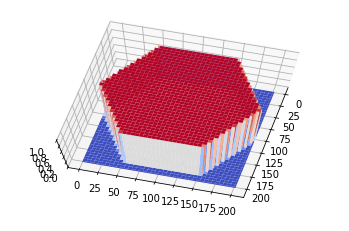

In [ ]:
N=200
rho2=drawhexagon(N)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X = np.arange(N+3)
Y = np.arange(N+3)
X, Y = np.meshgrid(X, Y)
surf = ax.plot_surface(X, Y, rho2, cmap=cm.coolwarm, linewidth=0, antialiased=True)
ax.view_init(75, 15)
plt.show()

In [ ]:
Nlist=[10, 20, 40]
itr_list=np.zeros((np.size(Nlist),3))
for i in range(np.size(Nlist,0)):
  N=Nlist[i]
  rho2=drawhexagon(N)
  phi,itr_list[i,0]=JR(rho2)
  phi,itr_list[i,1]=GSR(rho2)
  phi,itr_list[i,2]=SOR(rho2)

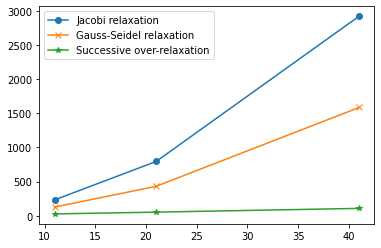

In [ ]:
plt.plot(np.array(Nlist)+3-2,itr_list[:,0],'-o',label=r'Jacobi relaxation')
plt.plot(np.array(Nlist)+3-2,itr_list[:,1],'-x',label=r'Gauss-Seidel relaxation')
plt.plot(np.array(Nlist)+3-2,itr_list[:,2],'-*',label=r'Successive over-relaxation')
plt.legend()

In [ ]:
p0=np.polyfit(np.array(Nlist)+3-2,itr_list[:,0],2)
p1=np.polyfit(np.array(Nlist)+3-2,itr_list[:,1],2)
p2=np.polyfit(np.array(Nlist)+3-2,itr_list[:,2],1)
print(p0[0])
print(p1[0])
print(p2[0])

1.671666666666666
0.9083333333333327
2.7071428571428573


In [ ]:
Nlist2=list(range(10,201,10))
itr_list2=np.zeros((np.size(Nlist2,0),1))
for i in range(np.size(Nlist2,0)):
  N=Nlist2[i]
  rho2=drawhexagon(N)
  itr_list2[i]=SOR(rho2)[1]

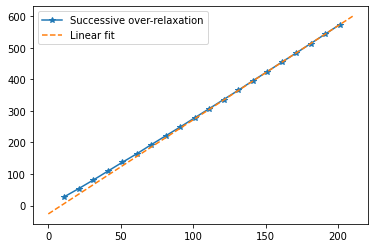

In [ ]:
p=np.polyfit(np.array(Nlist2[15:21])+3-2,itr_list2[15:21],1)
x=[0, max(Nlist2)+10]
plt.plot(np.array(Nlist2)+3-2,itr_list2,'-*',label=r'Successive over-relaxation')
plt.plot(x,p[0]*x+p[1],'--',label=r'Linear fit')
plt.legend()

# Finding the number of iterations needed to imporve error from $10^{-6}$ to $10^{-10}$ ($p=4$).

Here we adopt the modified successive overrelaxation method with checkboard (odd-even) update and Chebyshev acceleration, which helps speed up the initial iterations.  For more details, you can find them in [Numerical Recipes](http://numerical.recipes/book/book.html) Chap 20.5.1.

In [ ]:
#Jacobi relaxation
def JR_itr(rho):
  N_here=np.size(rho,0)
  phi=np.zeros((N_here,N_here))
  d=2
  itr=0
  e=1
  while e>10**-6:
      phi_old=copy.deepcopy(phi);
      for i in range(1,N_here-1):
          for j in range(1,N_here-1):
              phi[i,j]=1/(2*d)*(phi_old[i-1,j]+phi_old[i,j-1]+phi_old[i+1,j]+phi_old[i,j+1])+h**2/(2*d*epsilon)*rho[i,j]
      error=np.abs(phi_old-phi)
      e=np.max(error)
  while e>10**-10:
      phi_old=copy.deepcopy(phi);
      for i in range(1,N_here-1):
          for j in range(1,N_here-1):
              phi[i,j]=1/(2*d)*(phi_old[i-1,j]+phi_old[i,j-1]+phi_old[i+1,j]+phi_old[i,j+1])+h**2/(2*d*epsilon)*rho[i,j]
      error=np.abs(phi_old-phi)
      e=np.max(error)
      itr+=1
  return itr

In [ ]:
#Gauss-Seidel relaxation
def GSR_itr(rho):
  N_here=np.size(rho,0)
  phi=np.zeros((N_here,N_here))
  d=2
  itr=0
  e=1
  while e>10**-6:
      phi_old=copy.deepcopy(phi);
      for i in range(1,N_here-1):
          for j in range(1,N_here-1):
              phi[i,j]=1/(2*d)*(phi[i-1,j]+phi[i,j-1]+phi[i+1,j]+phi[i,j+1])+h**2/(2*d*epsilon)*rho[i,j]
      error=np.abs(phi_old-phi)
      e=np.max(error)
  while e>10**-10:
      phi_old=copy.deepcopy(phi);
      for i in range(1,N_here-1):
          for j in range(1,N_here-1):
              phi[i,j]=1/(2*d)*(phi[i-1,j]+phi[i,j-1]+phi[i+1,j]+phi[i,j+1])+h**2/(2*d*epsilon)*rho[i,j]
      error=np.abs(phi_old-phi)
      e=np.max(error)
      itr+=1
  return itr

In [ ]:
#Successive over-relaxation with checkboard update and Chebyshev acceleration
def SOR_itr(rho):
  N_here=np.size(rho,0)
  rj_square=np.cos(np.pi/(N_here-1))**2
  omega=1/(1-rj_square/2)
  phi=np.zeros((N_here,N_here))
  d=2
  itr=0
  e=1
  while e>10**-6:
      phi_old=copy.deepcopy(phi);
      alt=0
      for i in range(1,N_here-1):
          for j in range(1+alt,N_here-1,2):   #Checkboard update: odd meshes
              phi[i,j]=(1-omega)*phi[i,j]+omega*(1/(2*d)*(phi[i-1,j]+phi[i,j-1]+phi[i+1,j]+phi[i,j+1])+h**2/(2*d*epsilon)*rho[i,j])
          alt=1-alt
      alt=1
      omega=1/(1-rj_square*omega/4)
      for i in range(1,N_here-1):
          for j in range(1+alt,N_here-1,2):   #Checkboard update: even meshes
              phi[i,j]=(1-omega)*phi[i,j]+omega*(1/(2*d)*(phi[i-1,j]+phi[i,j-1]+phi[i+1,j]+phi[i,j+1])+h**2/(2*d*epsilon)*rho[i,j])
          alt=1-alt
      omega=1/(1-rj_square*omega/4)
      error=np.abs(phi_old-phi)
      e=np.max(error)
  while e>10**-10:
      phi_old=copy.deepcopy(phi);
      alt=0
      for i in range(1,N_here-1):
          for j in range(1+alt,N_here-1,2):   #Checkboard update: odd meshes
              phi[i,j]=(1-omega)*phi[i,j]+omega*(1/(2*d)*(phi[i-1,j]+phi[i,j-1]+phi[i+1,j]+phi[i,j+1])+h**2/(2*d*epsilon)*rho[i,j])
          alt=1-alt
      alt=1
      omega=1/(1-rj_square*omega/4)
      for i in range(1,N_here-1):
          for j in range(1+alt,N_here-1,2):   #Checkboard update: even meshes
              phi[i,j]=(1-omega)*phi[i,j]+omega*(1/(2*d)*(phi[i-1,j]+phi[i,j-1]+phi[i+1,j]+phi[i,j+1])+h**2/(2*d*epsilon)*rho[i,j])
          alt=1-alt
      omega=1/(1-rj_square*omega/4)
      error=np.abs(phi_old-phi)
      e=np.max(error)
      itr+=1
  return itr

In [ ]:
Nlist3=range(10,41,2)
itr_list3=np.zeros((np.size(Nlist3),3))
for i in range(len(Nlist3)):
  N=Nlist3[i]
  rho2=drawhexagon(N)
  itr_list3[i,0]=JR_itr(rho2)
  itr_list3[i,1]=GSR_itr(rho2)
  itr_list3[i,2]=SOR_itr(rho2)

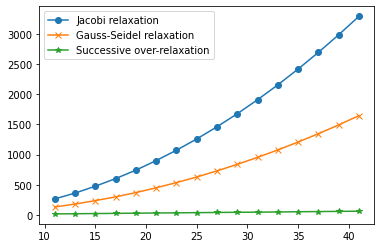

In [ ]:
plt.plot(np.array(Nlist3)+3-2,itr_list3[:,0],'-o',label=r'Jacobi relaxation')
plt.plot(np.array(Nlist3)+3-2,itr_list3[:,1],'-x',label=r'Gauss-Seidel relaxation')
plt.plot(np.array(Nlist3)+3-2,itr_list3[:,2],'-*',label=r'Successive over-relaxation')
plt.legend()

In [ ]:
l3=np.size(Nlist3,0)
p0=np.polyfit(np.array(Nlist3[l3-4:l3-1])+3-2,itr_list3[l3-4:l3-1,0],2)
p1=np.polyfit(np.array(Nlist3[l3-4:l3-1])+3-2,itr_list3[l3-4:l3-1,1],2)
p2=np.polyfit(np.array(Nlist3[l3-4:l3-1])+3-2,itr_list3[l3-4:l3-1,2],1)
print(p0[0])
print(p1[0])
print(p2[0])

1.874999999999952
0.8750000000000381
1.4999999999999891


The theoretical prediction of these three numbers are 2, 1, and 1.33 respectively

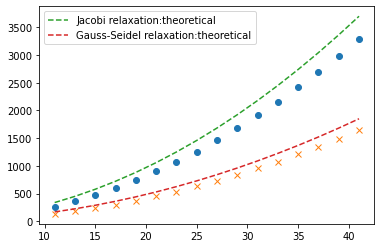

In [ ]:
plt.plot(np.array(Nlist3)+3-2,itr_list3[:,0],'o')
plt.plot(np.array(Nlist3)+3-2,itr_list3[:,1],'x')
plt.plot(np.array(Nlist3)+3-2,4/2*(np.array(Nlist3)+3)**2,'--',label=r'Jacobi relaxation:theoretical')
plt.plot(np.array(Nlist3)+3-2,4/4*(np.array(Nlist3)+3)**2,'--',label=r'Gauss-Seidel relaxation:theoretical')
plt.legend()

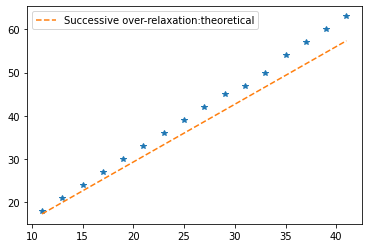

In [ ]:
plt.plot(np.array(Nlist3)+3-2,itr_list3[:,2],'*')
plt.plot(np.array(Nlist3)+3-2,4/3*(np.array(Nlist3)+3)**1,'--',label=r'Successive over-relaxation:theoretical')
plt.legend()

In [ ]:
Nlist4=list(range(10,101,10))
l4=np.size(Nlist4,0)
itr_list4=np.zeros((l4,1))
for i in range(np.size(Nlist4,0)):
  N=Nlist4[i]
  rho2=drawhexagon(N)
  itr_list4[i]=SOR_itr(rho2)

Slope= [1.4]


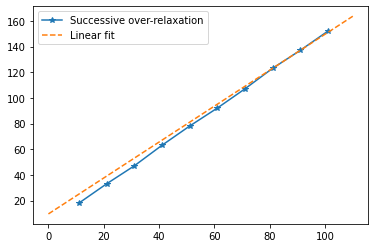

In [ ]:
p=np.polyfit(np.array(Nlist4[l4-3:l4-1])+3-2,itr_list4[l4-3:l4-1],1)
x=[0, max(Nlist4)+10]
plt.plot(np.array(Nlist4)+3-2,itr_list4,'-*',label=r'Successive over-relaxation')
plt.plot(x,p[0]*x+p[1],'--',label=r'Linear fit')
plt.legend()
print("Slope=",p[0])